In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dataset real de Kaggle (incluido en la librería)
df_diamonds = sns.load_dataset('diamonds')

1. Inspección Rápida (Sanity Check): Ejecuta los comandos básicos para ver qué columnas hay.

In [30]:
df_diamonds.shape

(53940, 10)

In [31]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [32]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* Pregunta: ¿Hay alguna columna que parezca inútil o redundante? (A veces hay índices repetidos).

    A simple vista no parece haber columnas redundantes

* Pregunta: ¿El precio (price) y los quilates (carat) son numéricos?

    price es un int64 y carat un float64. Asi que si, son numericos


2. La Pregunta del Millón (Correlación): El joyero cree que el Corte (cut: Ideal, Premium, Good...) es lo más importante para el precio. Yo creo que es el Tamaño (carat).

    * Haz una Matriz de Correlación (recuerda numeric_only=True) y muéstrame el mapa de calor (heatmap).

    * Decisión: ¿Quién tiene razón? ¿Qué variable tiene el número más alto cruzado con price?

In [33]:
df_diamonds['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [34]:
#transformo la columna cut a numerica, realizo el mapeo
map_cut={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
df_diamonds['cut_num']=df_diamonds['cut'].map(map_cut)
df_diamonds['cut_num']=df_diamonds['cut_num'].astype(int)

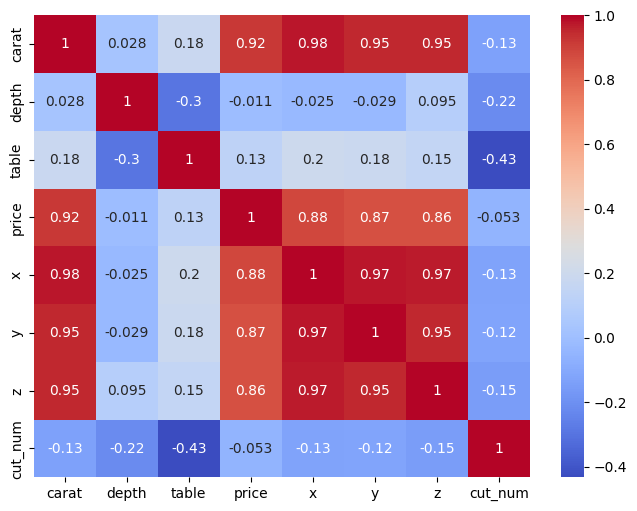

In [35]:
matriz=df_diamonds.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(data=matriz, annot=True, cmap='coolwarm')
plt.show()

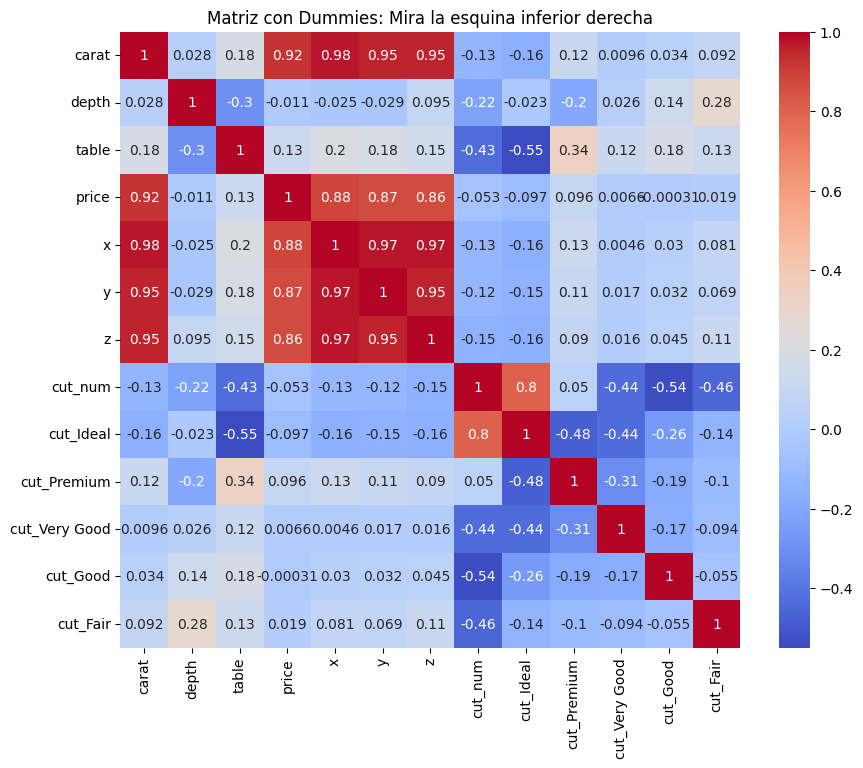

In [36]:
#uso pd.get_dummies para lo mismo
df_dummies = pd.get_dummies(df_diamonds['cut'], prefix='cut')
df_con_dummies = pd.concat([df_diamonds, df_dummies], axis=1)

matriz_dummies=df_con_dummies.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(data=matriz_dummies, cmap='coolwarm', annot=True) # annot=False para que no se vea sucio
plt.title('Matriz con Dummies: Mira la esquina inferior derecha')
plt.show()

Veredicto de Senior: ¿Cuál usar?

* Usa Mapeo (tu método) cuando la variable es ORDINAL (tiene un orden lógico: Tallas de ropa S/M/L, Calificaciones 1-5, Calidad de corte). Es mejor para ver la tendencia global.

* Usa Dummies cuando la variable es NOMINAL (no hay orden: Colores, Países, Marcas de coche). No puedes decir que "España > Francia", así que las separas para analizar cada una por su lado.

3. El Gráfico Definitivo: Haz un Scatter Plot.

    * Eje X: carat

    * Eje Y: price

    * Agrega una tercera dimensión: Colorea los puntos (hue) por la claridad (clarity) o el corte (cut).

    * Análisis: ¿Ves una línea recta perfecta o los precios se disparan exponencialmente cuando el diamante es grande?

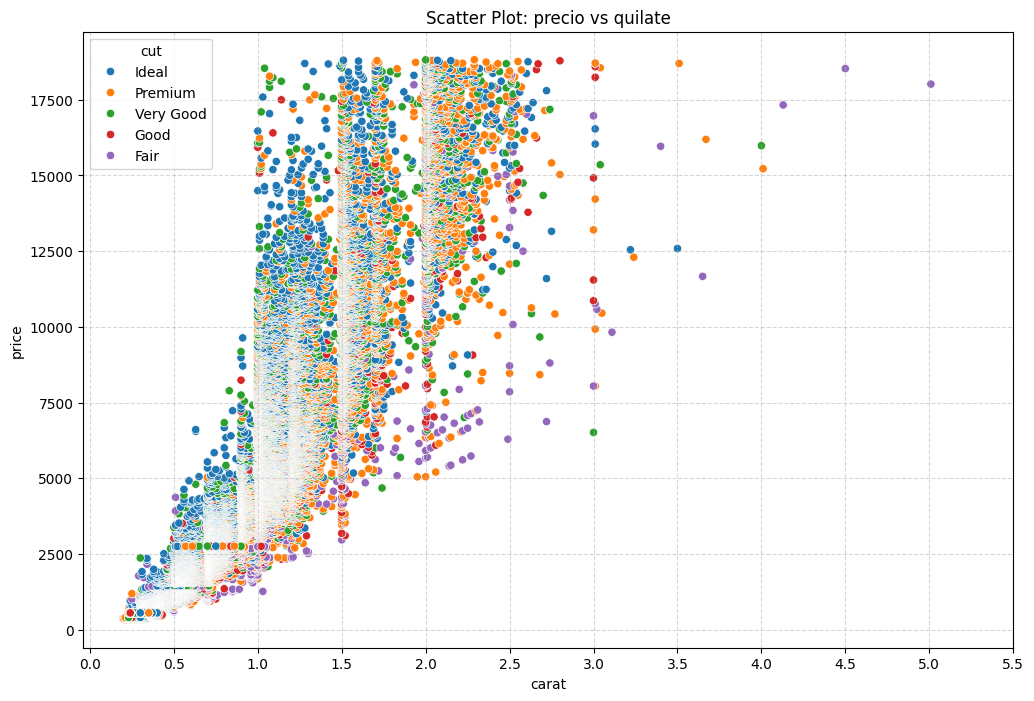

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_diamonds['carat'],y=df_diamonds['price'],hue=df_diamonds['cut'])
plt.title('Scatter Plot: precio vs quilate')
plt.xticks(np.arange(0, 6, 0.5))
plt.grid(True, linestyle='--', alpha=0.5) # Cuadrícula para leer mejor
plt.show()

4. Caza al Outlier (Filtro): Encuentra el "Diamante Monstruoso". Filtra el dataframe para mostrarme los diamantes que sean:

   * De más de 4 quilates (carat > 4).

   * Ordena la lista del más caro al más barato.

In [38]:
carat4=df_diamonds[df_diamonds['carat']>4]
carat4.sort_values(by='price',ascending=False)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,0
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,0
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,3
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,3
